<a href="https://colab.research.google.com/github/RaoBurhan001/Deep_Learning/blob/main/CNN_using_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train), (X_test,y_test) = cifar10.load_data()
print("X_Train shape:",X_train.shape)
print("X_Test shape:",X_test.shape)
print("y_Train shape:",y_train.shape)
print("y_Test shape:",y_test.shape)


170508288/170498071 [==============================] - 2s 0us/step
X_Train shape: (50000, 32, 32, 3)
X_Test shape: (10000, 32, 32, 3)
y_Train shape: (50000, 1)
y_Test shape: (10000, 1)


In [4]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
X_train=X_train/255.0
X_train.shape
X_test=X_test/255.0
X_test.shape


y_train = y_train.reshape(-1,)
y_test= y_test.reshape(-1,)
print("Y_train :" , y_train)
print("Y_test :" , y_test)


Y_train : [6 9 9 ... 9 1 1]
Y_test : [3 8 8 ... 5 1 7]


In [5]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])


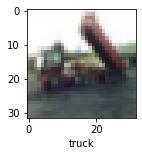

In [6]:

plot_sample(X_train, y_train, 2)

In [7]:
#Building the model

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32,kernel_size=3 , padding="SAME", input_shape=(32,32,3) , activation='relu'))
model.add(tf.keras.layers.Conv2D(64,kernel_size=3 , padding="SAME", activation='relu'))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2) , padding='valid' , strides=2))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [8]:
model.compile(optimizer='Adam' , loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

In [16]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 218s 139ms/step - loss: 0.7220 - accuracy: 0.7455 - val_loss: 0.9254 - val_accuracy: 0.6879
Epoch 2/10
1563/1563 [==============================] - 219s 140ms/step - loss: 0.6301 - accuracy: 0.7775 - val_loss: 0.9212 - val_accuracy: 0.6852
Epoch 3/10
1563/1563 [==============================] - 221s 142ms/step - loss: 0.5476 - accuracy: 0.8064 - val_loss: 0.9875 - val_accuracy: 0.6828
Epoch 4/10
1563/1563 [==============================] - 220s 141ms/step - loss: 0.4745 - accuracy: 0.8316 - val_loss: 0.9709 - val_accuracy: 0.6888
Epoch 5/10
1563/1563 [==============================] - 219s 140ms/step - loss: 0.4090 - accuracy: 0.8549 - val_loss: 1.0571 - val_accuracy: 0.6849
Epoch 6/10
1563/1563 [==============================] - 220s 141ms/step - loss: 0.3517 - accuracy: 0.8757 - val_loss: 1.1568 - val_accuracy: 0.6853
Epoch 7/10
1563/1563 [==============================] - 219s 140ms/step - loss: 0.3020 - accuracy: 0.8914 - val_

In [17]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 10s 33ms/step - loss: 1.4889 - accuracy: 0.6721


[1.4889167547225952, 0.6721000075340271]

In [18]:
y_pred = model.predict(X_test)
y_pred[:5]

array([[2.4415732e-07, 1.1941406e-09, 4.2222869e-03, 8.2505101e-01,
        1.7768398e-05, 1.6863325e-01, 1.9351643e-03, 2.5069468e-08,
        1.3789018e-04, 2.4222204e-06],
       [3.9355771e-07, 3.2076568e-04, 6.7516983e-13, 1.4712037e-15,
        2.6827947e-12, 9.7502816e-17, 4.1772563e-18, 2.8221393e-20,
        9.9967885e-01, 4.9872679e-09],
       [6.7095888e-01, 1.3653128e-02, 9.0658087e-03, 9.7511247e-07,
        2.2011132e-03, 4.3036144e-07, 9.0792710e-06, 4.9864687e-04,
        2.8222781e-01, 2.1384217e-02],
       [7.9864866e-01, 3.0846740e-04, 6.7983312e-03, 1.6259686e-05,
        4.3280938e-04, 7.2731854e-07, 1.6804383e-04, 4.4948639e-08,
        1.9328617e-01, 3.4049878e-04],
       [9.0443280e-17, 2.7756608e-12, 4.0437837e-05, 4.3657250e-04,
        9.6553960e-04, 1.4124319e-04, 9.9841619e-01, 3.9429505e-11,
        9.8151357e-12, 1.2695399e-12]], dtype=float32)

In [15]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[5, 8, 8, 8, 6]